In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd


# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# libraries for machine learning
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.preprocessing import *



sns.set_style('dark')

# ОБНАРУЖЕНИЕ ВРЕДОНОСНЫХ ПРОГРАММ МЕТОДАМИ
# МАШИННОГО ОБУЧЕНИЯ

### Классификация файлов на вредоносные и на не вредоносные методами машинного обучения.

### Набор данных является результатом исследования машинного обучении и обнаружении вредоносных программ. Он был построен с использованием библиотеки Python и содержит доброкачественные и вредоносные данные из PE-файлов.

## Загрузка данных. Тренировачная и тестовая выборка.

In [ ]:
train_data = pd.read_csv('dataset_malwares.csv')
test_data = pd.read_csv('dataset_test.csv')

FileNotFoundError: ignored

# * Data

Так как признаков очень много, то демонстрация будет проходить по отдельности по 10-12 признаков.

In [ ]:
train_data.iloc[:, : 11]

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,0
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,0
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,0
...,...,...,...,...,...,...,...,...,...,...,...
9054,VirusShare_a6f666f6ee1bc24eb43e7553bdd9fab4,23117,144,3,0,4,0,65535,0,184,0
9055,VirusShare_efbfd761beef7aee5a88f228c9f54038,23117,144,3,0,4,0,65535,0,184,0
9056,VirusShare_efd5b131b6fac49f1d5a60c4cc967240,23117,144,3,0,4,0,65535,0,184,0
9057,VirusShare_efe1145695db0ca86c1a9861f434a930,23117,144,3,0,4,0,65535,0,184,0


In [ ]:
train_data.iloc[:, 11 : 22]

,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable
0,0,0,64,0,0,0,248,34404,6,1236512358,0.0
1,0,0,64,0,0,0,240,332,5,1365109591,0.0
2,0,0,64,0,0,0,256,332,6,1438777028,0.0
3,0,0,64,0,0,0,128,332,7,1354629311,0.0
4,0,0,64,0,0,0,128,332,7,1386631250,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9054,0,0,64,0,0,0,192,34404,2,1424756337,0.0
9055,0,0,64,0,0,0,232,332,5,1109955351,0.0
9056,0,0,64,0,0,0,208,332,4,1398185783,0.0
9057,0,0,64,0,0,0,232,332,4,1241387873,0.0


In [ ]:
train_data.iloc[:, 22 : 30]

,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData
0,0,240,34,523,8,0,54784,189440
1,0,224,258,267,9,0,205824,139264
2,0,224,14,267,6,0,24576,20480
3,0,224,783,267,2,22,34304,28160
4,0,224,783,267,2,56,8192,89600
...,...,...,...,...,...,...,...,...
19606,0,224,258,267,11,0,16384,9216
19607,0,224,258,267,12,0,1183744,17670656
19608,0,224,8450,267,11,0,0,0
19609,0,224,8450,267,11,0,85504,277504


In [ ]:
train_data.iloc[:, 30 : 37]

,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion
0,0,51316,4096,4294967296,4096,512,6
1,0,84654,4096,4194304,4096,512,5
2,0,27364,256,4194304,4096,4096,4
3,297472,16685,4096,4194304,4096,512,4
4,512,4416,4096,4194304,4096,512,4
...,...,...,...,...,...,...,...
19606,0,18700,4096,4194304,4096,512,6
19607,0,664450,4096,4194304,4096,512,5
19608,0,0,0,268435456,4096,512,5
19609,0,84281,4096,268435456,4096,512,6


In [ ]:
train_data.iloc[:, 37 : 44]

,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum
0,0,6,0,5,2,1024,295281
1,0,0,0,5,0,1024,0
2,0,0,0,4,0,4096,0
3,0,6,0,4,0,1024,14174816
4,0,1,0,4,0,1024,0
...,...,...,...,...,...,...,...
19606,3,6,3,6,3,1024,28252
19607,1,0,0,5,1,1024,18898230
19608,0,0,0,5,0,1024,0
19609,3,6,3,6,3,1024,370840


In [ ]:
train_data.iloc[:, 44 : 52]

,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags
0,274432,2,32832,524288,8192,1048576,4096,0
1,442368,2,33088,1048576,4096,1048576,4096,0
2,49152,2,0,1048576,4096,1048576,69632,0
3,1032192,2,32768,2097152,4096,1048576,4096,0
4,110592,2,0,2097152,4096,1048576,4096,0
...,...,...,...,...,...,...,...,...
19606,36864,3,33088,262144,8192,1048576,4096,0
19607,18882560,2,33088,1048576,4096,1048576,4096,0
19608,278528,3,34112,0,0,0,0,0
19609,376832,2,320,262144,4096,1048576,4096,0


In [ ]:
train_data.iloc[:, 52 : 59]

,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy
0,16,1,0,0,6,0.000000,0
1,16,1,0,0,5,3.815281,0
2,528,1,0,0,6,0.103538,0
3,16,1,14,0,7,0.000000,0
4,16,1,2,0,7,0.000000,0
...,...,...,...,...,...,...,...
19606,16,0,3,0,5,0.183339,0
19607,16,0,25,0,5,4.786680,0
19608,16,0,0,0,4,4.366447,0
19609,16,0,0,0,5,2.672701,0


In [ ]:
train_data.iloc[:, 59 : 66]

,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual
0,512,0,274,0,188416,0,270336
1,8704,0,24124,0,205680,0,339968
2,4096,0,329,0,24065,0,45056
3,0,0,144,0,638976,0,1003520
4,0,0,24,0,42916,0,73728
...,...,...,...,...,...,...,...
19606,512,0,1164,0,16148,0,32768
19607,20992,0,33388,0,17354920,0,18821120
19608,8704,0,8588,0,203021,0,266240
19609,512,0,1724,0,262816,0,368640


In [ ]:
train_data.iloc[:, 66 : 72]

,SectionMinVirtual,SectionMaxPointerData,SectionMinPointerData,SectionMaxChar,SectionMainChar,DirectoryEntryImport
0,0,245248,0,3758096608,0,7
1,0,314880,0,3791650880,0,16
2,0,45056,0,3221225536,0,6
3,0,58880,0,3224371328,0,8
4,0,54784,0,3227516992,0,2
...,...,...,...,...,...,...
19606,0,23040,0,3221225536,0,8
19607,0,18795520,0,3221225536,0,10
19608,0,256000,0,3758096448,0,0
19609,0,355328,0,3221225536,0,12


In [ ]:
train_data.iloc[:, 72 : 80]

,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,152,0,0,54440,77824,73728,0
1,311,0,0,262276,294912,0,346112
2,176,0,0,36864,40960,0,0
3,155,0,0,356352,1003520,0,14109472
4,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...
19606,85,0,0,24948,28672,0,0
19607,391,0,0,1413420,1462272,0,18855424
19608,0,0,0,0,61440,0,0
19609,162,8,89008,94904,102400,0,0


# *

## Проверим, иммеются ли пропуски.

In [ ]:
for col in train_data.columns:
    pct_missing = np.mean(train_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
e_magic - 0%
e_cblp - 0%
e_cp - 0%
e_crlc - 0%
e_cparhdr - 0%
e_minalloc - 0%
e_maxalloc - 0%
e_ss - 0%
e_sp - 0%
e_csum - 0%
e_ip - 0%
e_cs - 0%
e_lfarlc - 0%
e_ovno - 0%
e_oemid - 0%
e_oeminfo - 0%
e_lfanew - 0%
Machine - 0%
NumberOfSections - 0%
TimeDateStamp - 0%
PointerToSymbolTable - 0%
NumberOfSymbols - 0%
SizeOfOptionalHeader - 0%
Characteristics - 0%
Magic - 0%
MajorLinkerVersion - 0%
MinorLinkerVersion - 0%
SizeOfCode - 0%
SizeOfInitializedData - 0%
SizeOfUninitializedData - 0%
AddressOfEntryPoint - 0%
BaseOfCode - 0%
ImageBase - 0%
SectionAlignment - 0%
FileAlignment - 0%
MajorOperatingSystemVersion - 0%
MinorOperatingSystemVersion - 0%
MajorImageVersion - 0%
MinorImageVersion - 0%
MajorSubsystemVersion - 0%
MinorSubsystemVersion - 0%
SizeOfHeaders - 0%
CheckSum - 0%
SizeOfImage - 0%
Subsystem - 0%
DllCharacteristics - 0%
SizeOfStackReserve - 0%
SizeOfStackCommit - 0%
SizeOfHeapReserve - 0%
SizeOfHeapCommit - 0%
LoaderFlags - 0%
NumberOfRvaAndSizes - 0%
Malware - 0

In [ ]:
train_data.isnull().sum()[: 41]

Name                           0
e_magic                        0
e_cblp                         0
e_cp                           0
e_crlc                         0
e_cparhdr                      0
e_minalloc                     0
e_maxalloc                     0
e_ss                           0
e_sp                           0
e_csum                         0
e_ip                           0
e_cs                           0
e_lfarlc                       0
e_ovno                         0
e_oemid                        0
e_oeminfo                      0
e_lfanew                       0
Machine                        0
NumberOfSections               0
TimeDateStamp                  0
PointerToSymbolTable           0
NumberOfSymbols                0
SizeOfOptionalHeader           0
Characteristics                0
Magic                          0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUnin

In [ ]:
train_data.isnull().sum()[41 : ]

MinorSubsystemVersion           0
SizeOfHeaders                   0
CheckSum                        0
SizeOfImage                     0
Subsystem                       0
DllCharacteristics              0
SizeOfStackReserve              0
SizeOfStackCommit               0
SizeOfHeapReserve               0
SizeOfHeapCommit                0
LoaderFlags                     0
NumberOfRvaAndSizes             0
Malware                         0
SuspiciousImportFunctions       0
SuspiciousNameSection           0
SectionsLength                  0
SectionMinEntropy               0
SectionMaxEntropy               0
SectionMinRawsize               0
SectionMaxRawsize               0
SectionMinVirtualsize           0
SectionMaxVirtualsize           0
SectionMaxPhysical              0
SectionMinPhysical              0
SectionMaxVirtual               0
SectionMinVirtual               0
SectionMaxPointerData           0
SectionMinPointerData           0
SectionMaxChar                  0
SectionMainCha

### Пропусков нет

# Вся информация, поступающая в модель, должна служить целям проекта. Если она не добавляет никакой ценности, от нее следует избавиться.

##Неинформативные признаки
Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации для проекта. Следовательно обнаружим их и удалим.

In [ ]:
num_rows = len(train_data.index)
low_information_cols = [] 

for col in train_data.columns:
    cnts = train_data[col].value_counts(dropna=False)
    top_pct = (cnts / num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)       

Признаки имеющие большой процент повторяющих значений.

In [ ]:
low_information_cols

['e_magic',
 'e_crlc',
 'e_cparhdr',
 'e_maxalloc',
 'e_ss',
 'e_sp',
 'e_csum',
 'e_ip',
 'e_cs',
 'e_lfarlc',
 'e_oemid',
 'e_oeminfo',
 'PointerToSymbolTable',
 'NumberOfSymbols',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'SuspiciousNameSection',
 'SectionMaxEntropy',
 'SectionMaxRawsize',
 'SectionMaxVirtualsize',
 'SectionMinPhysical',
 'SectionMinVirtual',
 'SectionMinPointerData',
 'SectionMainChar']

Удалим эти признаки.

In [ ]:
train_data = train_data.drop(low_information_cols, axis=1)

## Обучим и проверим качество модели на всех начальных признаках.

Модель машинного обучения: Decision Tree

In [ ]:
y_, X_ = train_data.Malware, train_data.drop(['Name', 'Malware'], axis=1)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.33, random_state=42)

sc = StandardScaler()

X_train_, X_test_ = sc.fit_transform(X_train_), sc.transform(X_test_)

In [ ]:
decision_tree = DecisionTreeClassifier()

parametrs = { 'criterion' : ('gini', 'entropy'),
              'splitter': ['best', 'random'],
              'min_weight_fraction_leaf': [0 + i * 0.01 for i in range(0, 51)],
              'max_features': ['sqrt', 'log2'],
              'max_depth': range(1, 20)}

grid = GridSearchCV(decision_tree, parametrs, cv=5)
grid.fit(X_train_, np.ravel(y_train_))

In [ ]:
grid.best_params_

              precision    recall  f1-score   support

      Benign       0.98      0.94      0.96      1668
     Malware       0.98      0.99      0.99      4804

    accuracy                           0.98      6472
   macro avg       0.98      0.97      0.97      6472
weighted avg       0.98      0.98      0.98      6472



Text(33.0, 0.5, 'True labels')

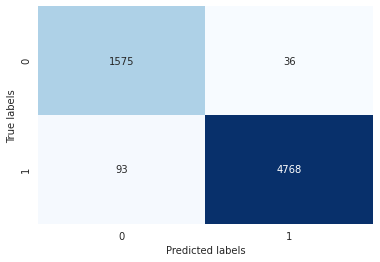

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features='sqrt', max_depth=10)

decision_tree.fit(X_train_, y_train_)
y_pred_ = decision_tree.predict(X_test_)

print(classification_report(y_test_, y_pred_, target_names=['Benign', 'Malware']))

ax = sns.heatmap(confusion_matrix(y_pred_, y_test_), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### Видим, что точность приемлема, но возможно можно и лучше, т.к на кону безопасность нашего компьютера.

## Отберем информативные признаки.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Feature ranking:
0. feature 39 (0.122400)
1. feature 23 (0.120499)
2. feature 44 (0.066306)
3. feature 67 (0.062783)
4. feature 32 (0.057379)
5. feature 40 (0.053326)
6. feature 45 (0.046729)
7. feature 36 (0.040475)
8. feature 46 (0.030652)
9. feature 35 (0.030538)
10. feature 24 (0.028126)
11. feature 25 (0.023589)
12. feature 19 (0.023547)
13. feature 17 (0.019307)
14. feature 34 (0.018798)
15. feature 55 (0.017866)
16. feature 6 (0.017411)
17. feature 33 (0.016079)
18. feature 52 (0.014452)
19. feature 69 (0.012725)
20. feature 41 (0.010704)
21. feature 16 (0.010577)
22. feature 42 (0.010518)
23. feature 22 (0.010111)
24. feature 37 (0.009715)
25. feature 54 (0.009583)
26. feature 38 (0.008705)
27. feature 18 (0.007677)
28. feature 76 (0.007565)
29. feature 26 (0.006900)
30. feature 71 (0.005853)
31. feature 65 (0.005810)
32. feature 70 (0.005515)
33. feature 28 (0.004947)
34. feature 59 (0.004772)
35. feature 48 (0.004288)
36. feature 30 (0.004101)
37. feature 57 (0.004071)
38. fe

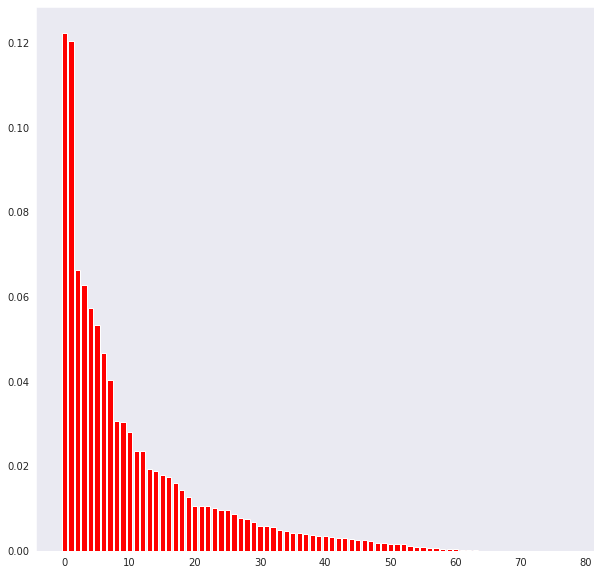

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y, X = pd.DataFrame(train_data.Malware), train_data.drop(['Malware', 'Name'], axis=1)

Mass_X = pd.DataFrame()

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices_1 = np.array([], dtype=int)


print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f, indices[f], importances[indices[f]]))
    indices_1 = np.append(indices_1, indices[f])
    

    
plt.figure(figsize=(10, 10))
plt.bar(range(len(indices_1)), importances[indices_1], color="r", align="center",)
plt.show()

data = train_data[train_data.columns[indices_1]]
data['Malware'] = train_data.Malware

## DataFrame с которым мы будем дальше работать.

In [ ]:
data

,SizeOfOptionalHeader,MinorImageVersion,SizeOfImage,SectionMaxVirtual,BaseOfCode,MajorSubsystemVersion,Subsystem,DllCharacteristics,MajorOperatingSystemVersion,e_lfanew,Characteristics,FileAlignment,Magic,NumberOfSections,SectionAlignment,SuspiciousImportFunctions,ImageBase,SizeOfStackCommit,SectionMaxPointerData,MinorSubsystemVersion,Malware
0,240,0,274432,270336,4096,5,2,32832,6,248,34,512,523,6,4096,0,4294967296,8192,245248,2,1
1,224,0,442368,339968,4096,5,2,33088,5,240,258,512,267,5,4096,0,4194304,4096,314880,0,1
2,224,0,49152,45056,256,4,2,0,4,256,14,4096,267,6,4096,0,4194304,4096,45056,0,1
3,224,0,1032192,1003520,4096,4,2,32768,4,128,783,512,267,7,4096,14,4194304,4096,58880,0,1
4,224,0,110592,73728,4096,4,2,0,4,128,783,512,267,7,4096,2,4194304,4096,54784,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,224,3,36864,32768,4096,6,3,33088,6,240,258,512,267,5,4096,3,4194304,8192,23040,3,0
19607,224,0,18882560,18821120,4096,5,2,33088,5,264,258,512,267,5,4096,25,4194304,4096,18795520,1,0
19608,224,0,278528,266240,0,5,3,34112,5,128,8450,512,267,4,4096,0,268435456,0,256000,0,0
19609,224,3,376832,368640,4096,6,2,320,6,224,8450,512,267,5,4096,0,268435456,4096,355328,3,0


## Статистика по признакам

In [ ]:
data

,SizeOfOptionalHeader,MinorImageVersion,SizeOfImage,SectionMaxVirtual,BaseOfCode,MajorSubsystemVersion,Subsystem,DllCharacteristics,MajorOperatingSystemVersion,e_lfanew,Characteristics,FileAlignment,Magic,NumberOfSections,SectionAlignment,SuspiciousImportFunctions,ImageBase,SizeOfStackCommit,SectionMaxPointerData,MinorSubsystemVersion,Malware
0,240,0,274432,270336,4096,5,2,32832,6,248,34,512,523,6,4096,0,4294967296,8192,245248,2,1
1,224,0,442368,339968,4096,5,2,33088,5,240,258,512,267,5,4096,0,4194304,4096,314880,0,1
2,224,0,49152,45056,256,4,2,0,4,256,14,4096,267,6,4096,0,4194304,4096,45056,0,1
3,224,0,1032192,1003520,4096,4,2,32768,4,128,783,512,267,7,4096,14,4194304,4096,58880,0,1
4,224,0,110592,73728,4096,4,2,0,4,128,783,512,267,7,4096,2,4194304,4096,54784,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,224,3,36864,32768,4096,6,3,33088,6,240,258,512,267,5,4096,3,4194304,8192,23040,3,0
19607,224,0,18882560,18821120,4096,5,2,33088,5,264,258,512,267,5,4096,25,4194304,4096,18795520,1,0
19608,224,0,278528,266240,0,5,3,34112,5,128,8450,512,267,4,4096,0,268435456,0,256000,0,0
19609,224,3,376832,368640,4096,6,2,320,6,224,8450,512,267,5,4096,0,268435456,4096,355328,3,0


Посмотрим на распределения оставшихся признаков, а также целевого.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96d2eeb358>,
      dtype=object)

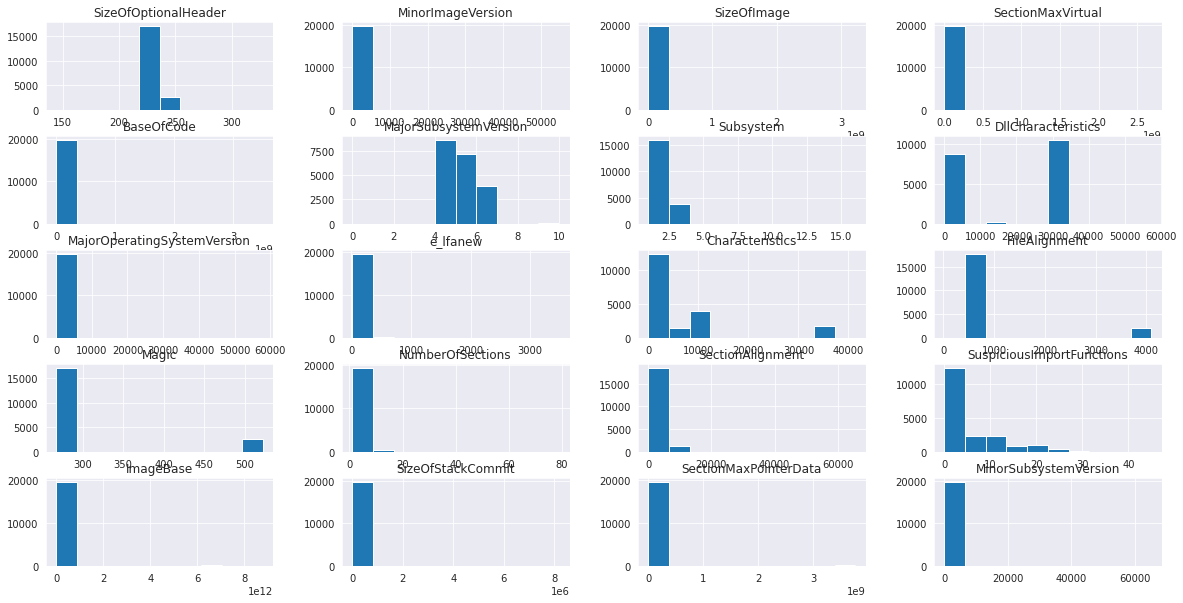

In [ ]:
data.drop(['Malware'], axis=1).hist(figsize=(20, 10))

### Распределение целевого признака.

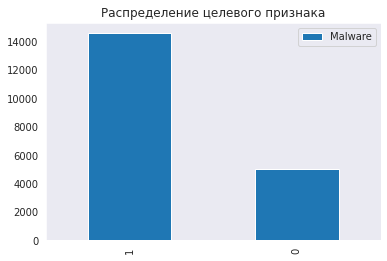

In [ ]:
data['Malware'].value_counts().plot(kind='bar', label='Malware')
plt.legend()
plt.title('Распределение целевого признака');

### Посмотрим на матрицу корреляции.

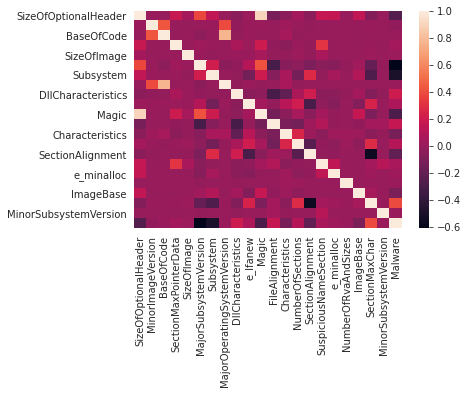

In [ ]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix)

## Разделим нашу выборку. Чтобы можно было проверить наши результаты на размеченных данных, перед использованием на новых данных.





In [ ]:
y, X = data.Malware, data.drop(['Malware'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

# Decision Tree

## Подберем лучшие параметры для модели

In [ ]:
decision_tree = DecisionTreeClassifier()

parametrs = { 'criterion' : ('gini', 'entropy'),
              'splitter': ['best', 'random'],
              'min_weight_fraction_leaf': [0 + i * 0.01 for i in range(0, 51)],
              'max_features': ['sqrt', 'log2'],
              'max_depth': range(1, 20)}

grid = GridSearchCV(decision_tree, parametrs, cv=5)
grid.fit(X_train, np.ravel(y_train))

In [ ]:
grid.best_params_

## Обучим модель решающее дерево и проверим качество.

              precision    recall  f1-score   support

      Benign       0.97      0.94      0.96      1668
     Malware       0.98      0.99      0.98      4804

    accuracy                           0.98      6472
   macro avg       0.97      0.97      0.97      6472
weighted avg       0.98      0.98      0.98      6472



Text(33.0, 0.5, 'True labels')

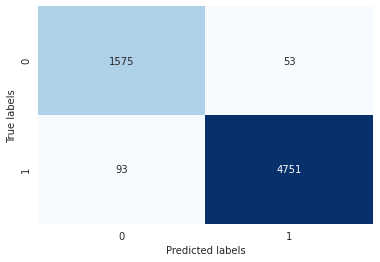

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_features='sqrt', max_depth=12)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Random Forest

## Подберем параметры для модели случайный лес.

In [ ]:
rand_forest = RandomForestClassifier()

parametrs = { 'n_estimators': range (1, 50, 10),
              'max_depth': range (1,13, 2),
              'criterion': ['gini', 'entropy']}

grid = GridSearchCV(rand_forest, parametrs, cv=5)
grid.fit(X_train, np.ravel(y_train))

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 41}

## Обучим модель случайного леса и проверим качество.

              precision    recall  f1-score   support

      Benign       0.98      0.95      0.97      1668
     Malware       0.98      0.99      0.99      4804

    accuracy                           0.98      6472
   macro avg       0.98      0.97      0.98      6472
weighted avg       0.98      0.98      0.98      6472



Text(33.0, 0.5, 'True labels')

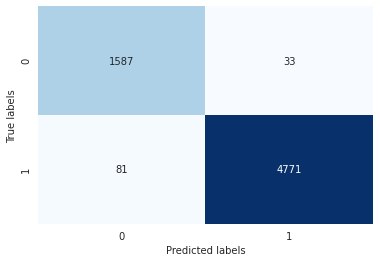

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=41, criterion='entropy', max_depth=11)

rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Gradient Boosting

## Подберем параметры для Gradient Boosting.

In [ ]:
grad_boost = GradientBoostingClassifier()

parametrs = {'n_estimators': range (90, 121, 10),
              'subsample': [i * 0.1 for i in range(1, 11)],
              'loss': ['deviance', 'exponential']}

grid = GridSearchCV(grad_boost, parametrs, cv=5)
grid.fit(X_train, np.ravel(y_train))

In [ ]:
grid.best_params_

{'loss': 'deviance', 'n_estimators': 120, 'subsample': 0.9}

## Обучим модель градиентного бустинга и проверим качество.

              precision    recall  f1-score   support

      Benign       0.97      0.94      0.96      1668
     Malware       0.98      0.99      0.99      4804

    accuracy                           0.98      6472
   macro avg       0.98      0.97      0.97      6472
weighted avg       0.98      0.98      0.98      6472



Text(33.0, 0.5, 'True labels')

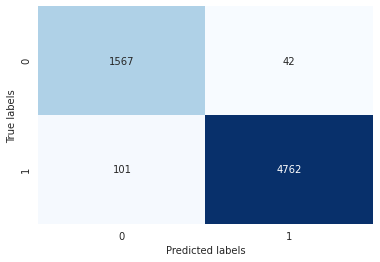

In [ ]:
grad_boost = GradientBoostingClassifier(loss='deviance', n_estimators=120, subsample=0.9)

grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')